## Pre-processing of Images before Registration

In [177]:
import os
from os import listdir, mkdir
from os.path import isdir, join
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.exposure import histogram
from skimage import exposure

In [9]:
# Remove skull from MNI template image
from nibabel.funcs import four_to_three
mni_atlas_folder = './data/MNITemplateAtlas/'
mni_atlas_path = 'atlas.nii.gz'
mni_template_path = 'template.nii.gz'

mni_atlas = nib.load(join(mni_atlas_folder, mni_atlas_path))
# 1st - Mask, 2nd - CSF, 3rd - GM, 4th - WM
ext = '.nii.gz'
names = ['Mask', 'CSF_probs', 'GM_probs', 'WM_probs']


imgs = four_to_three(mni_atlas)
mask_img = imgs[0]
mask_data = 1 - mask_img.get_data()
masked_img = nib.Nifti1Image(mask_data, mni_template.affine, mni_template.header)
nib.save(masked_img, join(mni_atlas_folder, 'Mask' + ext))

# Apply mask to MNI template and save
mni_template = nib.load(join(mni_atlas_folder, mni_template_path))
template_data = mni_template.get_data()
masked_template_data = mask_data * template_data
masked_template_img = nib.Nifti1Image(masked_template_data, mni_template.affine, mni_template.header)
nib.save(masked_template_img, join(mni_atlas_folder, 'masked_template' + ext))

In [166]:
# Normalize array from 0 to 255
def normalize(target_array, max_val=255):
    target_array -= target_array.min()
    normalized_array = max_val * np.divide(target_array, target_array.max())
    return normalized_array

# Read nii from path and normalize array from 0 to 1
def read_im(image_path):
    nii_img = nib.load(image_path)
    nii_data = nii_img.get_data()
    return nii_data, nii_img

def hist_stretch(data, cutoff_percent, nbins=256):
    # Contrast stretching
    hist1, _ = histogram(data, nbins=nbins)
    cdf1 = np.cumsum(hist1) / np.cumsum(hist1)[-1]
    print(cdf1)
    p99 = np.argwhere(cdf1>cutoff_percent)
    cutoff_val = p99[0]
    print(cutoff_val)
    data[data > cutoff_val] = cutoff_val
    data_rescale = data
    data_rescale = normalize(data)
    return data_rescale

In [18]:
# Normalize the MNI atlas
mni_atlas_folder = './data/MNITemplateAtlas/'
mni_template_path = 'masked_template.nii.gz'
result_folder = "./data/MNITemplateAtlas-norm"

# Read nii from path and normalize array from 0 to 255
temp_data, temp_img = read_im(join(mni_atlas_folder, mni_template_path))
temp_data = normalize(temp_data)
template_img = nib.Nifti1Image(temp_data, temp_img.affine, temp_img.header)
nib.save(template_img, join(result_folder, mni_template_path))

In [90]:
# Function to pre-process data using histogram matching
def hist_match(target_data, base_data, nbins=256):
    """Function to pre-process data using histogram matching
        Input: data(np.array): data to be pre-processed"""
    from skimage.exposure import histogram
    M = np.zeros(((nbins,1)))
    hist1, _ = histogram(target_data, nbins=nbins)
    hist2, _ = histogram(base_data, nbins=nbins)
    
    cdf1 = np.cumsum(hist1) / np.cumsum(hist1)[-1]
    cdf2 = np.cumsum(hist2) / np.cumsum(hist2)[-1]
    plt.plot(range(1, nbins), hist1[1:])
    plt.title("Hist 1")
    plt.show()
    
    plt.plot(range(1, nbins), hist2[1:])
    plt.title("Hist 2")
    plt.show()
    
    # Compute the mapping
    for i in range(0, nbins):
        ind = np.argmin(np.abs(cdf1[i] - cdf2))
        M[i] = ind

    plt.plot(range(0, nbins), M)
    plt.title("Hist M")
    plt.show()
    
    print(M)
    print(M.max(), M.min())
    #print()
    hist_mapped_data = M[target_data.astype(int)]
    
    return hist_mapped_data

In [13]:
data_folder_name = "Training_Set"
data_dir = f"./data/{data_folder_name}/"
onlydirs = [f for f in listdir(data_dir) if isdir(join(data_dir, f))]

In [ ]:
# Path to result folder
result = "./pre-processed-data/"

In [11]:
for f in onlydirs:
    # Import image to be processed
    img_path = join(data_dir,f,f'{f}.nii.gz')
    img = nib.load(img_path)
    data = img.get_data()
    
    # Pre-process image data
    
    
    # Make result directory
    os.mkdir(join(result,data_folder_name,f))
    print(np.max(data))
    print(np.min(data))

152
0
215
0
185
0
158
0
134
0
94
0
173
0
122
0
79
0
159
0


In [ ]:
# Perform histogram matching before registration
M = np.zeros((256,1))
hist1 = 

In [152]:
img_path = join(data_dir,f,f'{f}.nii.gz')
img = nib.load(img_path)
data = img.get_data()
data.shape

(256, 128, 256, 1)

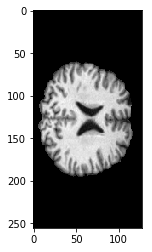

In [29]:
plt.imshow(data[:,:,150,0], cmap = "gray")
plt.show()

In [30]:
f

'IBSR_09'

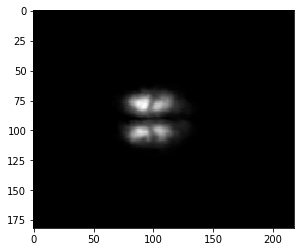

In [33]:
plt.imshow(temp_data[:,:,150], cmap = "gray")
plt.show()

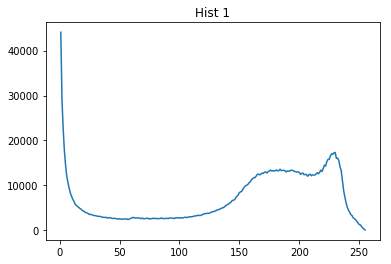

ValueError: x and y must have same first dimension, but have shapes (255,) and (159,)

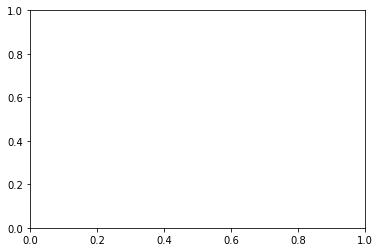

In [102]:
img_path = join(data_dir,f,f'{f}.nii.gz')
img = nib.load(img_path)
data = img.get_data()
#data = normalize(data)
hist_matched_data = hist_match(temp_data, data, nbins=256)

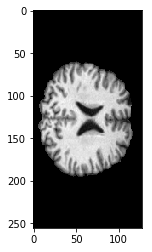

In [104]:
plt.imshow(data[:,:,150,0], cmap = "gray")
plt.show()

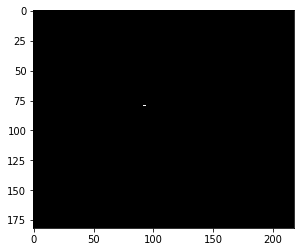

In [175]:
plt.imshow(hist_matched_data[:,:,150,0], cmap = "gray")
plt.show()

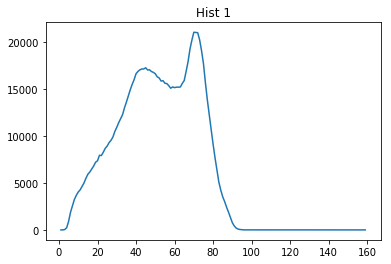

In [153]:
hist1, _ = histogram(data, nbins=256)
plt.plot(range(1, len(hist1)), hist1[1:])
plt.title("Hist 1")
plt.show()

[0.88050115 0.88050115 0.88050151 0.88050652 0.88053477 0.88064432
 0.88086975 0.88117599 0.88156283 0.88200176 0.88248265 0.88299131
 0.88354409 0.88414025 0.88479567 0.88550186 0.88623607 0.88700759
 0.88781786 0.88867617 0.88955271 0.8904984  0.8914417  0.89242685
 0.89346063 0.89452338 0.89563048 0.89676607 0.89794374 0.89919281
 0.90049398 0.9018538  0.903265   0.90472603 0.90627396 0.90789497
 0.90959573 0.91137314 0.91321945 0.91512477 0.91710508 0.91911435
 0.92114401 0.92318404 0.92522454 0.92728019 0.9293077  0.93133759
 0.93334568 0.93534291 0.93732238 0.93926299 0.94118965 0.94307697
 0.94496882 0.94682825 0.94868338 0.95051122 0.95230722 0.95412004
 0.95592368 0.95773399 0.95954311 0.96135521 0.96321225 0.96510589
 0.96711528 0.96924806 0.97154093 0.97394788 0.9764539  0.97895694
 0.98145759 0.98386717 0.98614001 0.98824751 0.9901154  0.9917655
 0.9932313  0.99450278 0.99558926 0.99650347 0.99725878 0.99786246
 0.99836564 0.99878514 0.99914384 0.99943161 0.99965668 0.99981

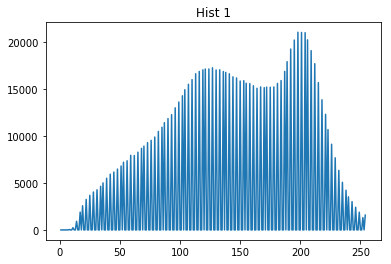

In [168]:
data_str = hist_stretch(data, 0.99999, nbins=160)
print(np.max(data_str))
hist1, _ = histogram(data_str, nbins=255)
plt.plot(range(1, len(hist1)), hist1[1:])
plt.title("Hist 1")
plt.show()

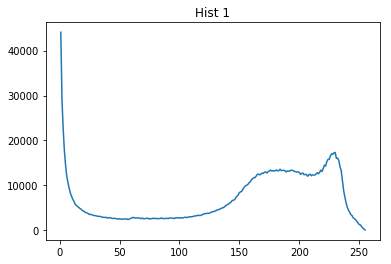

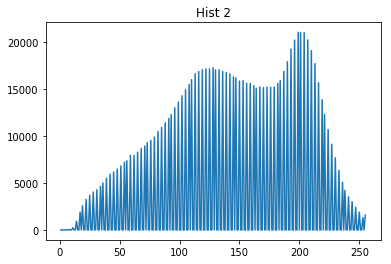

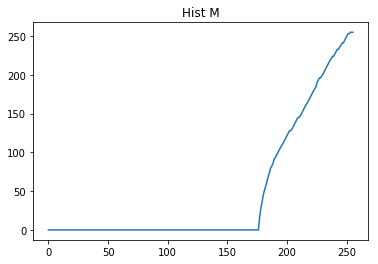

[[  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]


In [169]:
hist_matched_data = hist_match(temp_data, data_str, nbins=256)

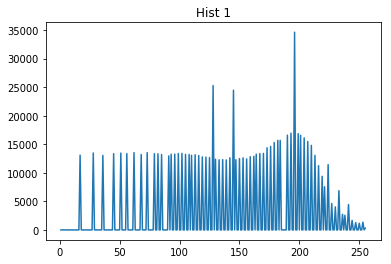

In [172]:
hist, _ = histogram(hist_matched_data, nbins=256)
plt.plot(range(1, 256), hist[1:])
plt.title("Hist 1")
plt.show()
    

In [188]:
# Write commands for elastix test set registration
# Add parameter folder name and paramter file names (must be saved in ./parameter-files folder)
param_file = 'validation' # folder name where results will be saved
param_1 = 'par0000affine.txt'
param_2 = 'par0000bspline.txt'
data_dir = "./data/Training_Set"
test_ims = [f for f in listdir(data_dir) if isdir(join(data_dir, f))]
result_folder = "./registered-data/Validation_Set/"
# mkdir(result_folder)
# mkdir(os.path.join(result_folder,"templates"))
# mkdir(os.path.join(result_folder,"labels"))

In [184]:
# Section writes to file in src folder
fixed_im_path = './data/MNITemplateAtlas-norm/masked_template.nii.gz'

with open(f"elastix_{param_file}", 'w+') as out_f:
    
    for chosen_im in test_ims:
        moving_im_path = os.path.join(data_dir, f'{chosen_im}/{chosen_im}.nii.gz')
        result_path = os.path.join(result_folder, "templates", chosen_im)
        param_1_path = param_1
        param_2_path = param_2    
        mkdir(result_path)
        cmd = f"elastix -f {fixed_im_path} -m {moving_im_path} -out {result_path} -p {param_1_path} -p {param_2_path}\n"
        out_f.write(cmd)

In [185]:
with open(f"transformix_{param_file}", 'w+') as out_f:
    for chosen_im in test_ims:
        labels_path = os.path.join(data_dir, f'{chosen_im}/{chosen_im}_seg.nii.gz')
        result_path = os.path.join(result_folder, f"labels/{chosen_im}")
        mkdir(result_path)
        parameters_path = os.path.join(result_folder, f"templates/{chosen_im}/TransformParameters.1.txt")
        cmd = f"transformix -in {labels_path} -out {result_path} -tp {parameters_path}\n"
        out_f.write(cmd)

In [182]:
from tempfile import mkstemp
from shutil import move
from os import fdopen, remove

def replace(file_path, pattern, subst):
    """
    Replace strings in a file.
    
    Parametrs:
        pattern (str, iterable): pattern to replace.
        subst (str, iterable): subtitution.
    
    """
    #Create temp file
    fh, abs_path = mkstemp()
    with fdopen(fh,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

In [189]:
result_folder = "./registered-data/Training_Set/"
#Change line "(FinalBSplineInterpolationOrder 3)" in Transform parameters files
bad_files = []

for chosen_im in test_ims:
    try:
        parameters0_path = os.path.join(result_folder, "templates", f"{chosen_im}/TransformParameters.0.txt")
        parameters1_path = os.path.join(result_folder, "templates", f"{chosen_im}/TransformParameters.1.txt")
        
        replace(parameters0_path,"(FinalBSplineInterpolationOrder 3)","(FinalBSplineInterpolationOrder 0)")
        #replace(parameters0_path, '(ResultImagePixelType "short")', '(ResultImagePixelType "float")')
        #replace(parameters0_path, '(ResultImageFormat "nii")', '(ResultImageFormat "nii.gz")')
        
        replace(parameters1_path,"(FinalBSplineInterpolationOrder 3)","(FinalBSplineInterpolationOrder 0)")
        #replace(parameters1_path, '(ResultImagePixelType "short")', '(ResultImagePixelType "float")')
        #replace(parameters1_path, '(ResultImageFormat "nii")', '(ResultImageFormat "nii.gz")')
        
    except IOError as e:
        print(e)
        bad_files.append(f)

print(bad_files)

[]
